# Zomato API Project

## 1.	The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import collections
from requests.auth import HTTPBasicAuth

data = pd.read_csv(r'C:\Users\Saachi Talwar\Desktop\zomato\zomato.csv', encoding='latin')
df = data.copy()
df1 = data[df['Country Code']==1]
df1.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
627,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
628,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177


### a)	Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

Number of restaurants in Delhi-NCR: 7947
Number of restaurants in Rest of India: 705


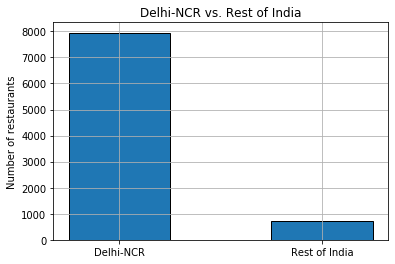

In [89]:
df1.loc[(df1["City"]=="New Delhi") | (df1["City"]=="Ghaziabad") | (df1["City"]=="Noida") | 
        (df1["City"]=="Gurgaon") | (df1["City"]=="Faridabad"),"City"]="Delhi-NCR"

ncr = df1.loc[df1['City']=='Delhi-NCR']
rest = df1.loc[df1['City']!='Delhi-NCR']
ncr_value = len(ncr)
rest_value = len(rest)
print('Number of restaurants in Delhi-NCR:', ncr_value)
print('Number of restaurants in Rest of India:', rest_value)

place = ['Delhi-NCR', 'Rest of India']
num_res = [ncr_value, rest_value]

plt.bar(place, num_res, width = 0.5, edgecolor='black')
plt.ylabel('Number of restaurants')
plt.title('Delhi-NCR vs. Rest of India')
plt.grid()
plt.show()

### b)	Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

In [90]:
ncr_val = df1.loc[df1['City']=='Delhi-NCR', 'Cuisines']
rest_val = df1.loc[df1['City']!='Delhi-NCR', 'Cuisines']

n = dict()
r = dict()
for i in ncr_val:
    x = i.split(',')
    for j in x:
        j = j.strip()
        if j in n:
            n[j] += 1
        else:
            n[j] = 1
for i in rest_val:
    x = i.split(',')
    for j in x:
        j = j.strip()
        if j in r:
            r[j] += 1
        else:
            r[j] = 1
            
l1 = []
l2 = []
for i in n:
    l1.append(i)
for i in r:
    l2.append(i)
    
absent = []
for i in l1:
    for j in l2:
        if j not in l1:
            print(j)
            absent.append(j)
    break
    
# Malwani and BBQ can be found in Delhi-NCR using Zomato API.
# Therefore, the given dataset is incomplete.

German
Malwani
BBQ
Cajun


In [91]:
# Checking using Zomato API whether this cuisines are actually not served 
# in restaurants of Delhi-NCR or just it due to incomplete dataset

cuisines_api = {}

# For Delhi
res = requests.get('https://developers.zomato.com/api/v2.1/cuisines',
                   headers = { 'user-key': '92169e9d1747e1dd1c755f8d9b9604c5'},
                   params ={'lat':28.704060 ,'lon':77.102493 })
res = res.json()
data = res['cuisines']
for ele in data:
    cuisine = ele['cuisine']['cuisine_name']
    if cuisine in cuisines_api:
        cuisines_api[cuisine] += 1
    else:
        cuisines_api[cuisine] = 1

# For Noida
res = requests.get('https://developers.zomato.com/api/v2.1/cuisines',
                   headers = { 'user-key': '92169e9d1747e1dd1c755f8d9b9604c5'},
                   params ={'lat':28.535517 ,'lon':77.391029 })
res = res.json()
data = res['cuisines']
for ele in data:
    cuisine = ele['cuisine']['cuisine_name']
    if cuisine in cuisines_api:
        cuisines_api[cuisine] += 1
    else:
        cuisines_api[cuisine] = 1
        
# For Ghaziabad
res = requests.get('https://developers.zomato.com/api/v2.1/cuisines',
                   headers = { 'user-key': '92169e9d1747e1dd1c755f8d9b9604c5'},
                   params ={'lat':28.711241 ,'lon':77.4445372 })
res = res.json()
data = res['cuisines']
for ele in data:
    cuisine = ele['cuisine']['cuisine_name']
    if cuisine in cuisines_api:
        cuisines_api[cuisine] += 1
    else:
        cuisines_api[cuisine] = 1
        
        
# For Gurgoan
res = requests.get('https://developers.zomato.com/api/v2.1/cuisines',
                   headers = { 'user-key': '92169e9d1747e1dd1c755f8d9b9604c5'},
                   params ={'lat':28.4282624 ,'lon':77.0027001 })
res = res.json()
data = res['cuisines']
for ele in data:
    cuisine = ele['cuisine']['cuisine_name']
    if cuisine in cuisines_api:
        cuisines_api[cuisine] += 1
    else:
        cuisines_api[cuisine] = 1
    
# For Faridabad
res = requests.get('https://developers.zomato.com/api/v2.1/cuisines',
                   headers = { 'user-key': '92169e9d1747e1dd1c755f8d9b9604c5'},
                   params ={'lat':28.402837 ,'lon':77.3085626 })
res = res.json()
data = res['cuisines']
for ele in data:
    cuisine = ele['cuisine']['cuisine_name']
    if cuisine in cuisines_api:
        cuisines_api[cuisine] += 1
    else:
        cuisines_api[cuisine] = 1

api_list = list(cuisines_api.keys())

# Comparing our list absent to api_list
for ele in absent:
    print(ele,end=' ')
    if ele in api_list:
        print(": Error in dataset given")
    else:
        print(": Absent in the Delhi-NCR Region")

German : Absent in the Delhi-NCR Region
Malwani : Error in dataset given
BBQ : Error in dataset given
Cajun : Absent in the Delhi-NCR Region


### c)	Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

In [92]:
ncr_val = df1.loc[df1['City']=='Delhi-NCR', 'Cuisines']
rest_val = df1.loc[df1['City']!='Delhi-NCR', 'Cuisines']

n = dict()
r = dict()
for i in ncr_val:
    x = i.split(',')
    for j in x:
        j = j.strip()
        if j in n:
            n[j] += 1
        else:
            n[j] = 1
for i in rest_val:
    x = i.split(',')
    for j in x:
        j = j.strip()
        if j in r:
            r[j] += 1
        else:
            r[j] = 1

sorted_ncr = sorted(n.items(), key=lambda kv:kv[1], reverse=True)[:10]
sorted_rest = sorted(r.items(), key=lambda kv:kv[1], reverse=True)[:10]

print('Top 10 cuisines served by maximum number of restaurants in Delhi-NCR')
for i in sorted_ncr:
    print(i[0],':', i[1])
    
print()
          
print('Top 10 cuisines served by maximum number of restaurants in Rest of India')
for j in sorted_rest:
    print(j[0],':' ,j[1])

Top 10 cuisines served by maximum number of restaurants in Delhi-NCR
North Indian : 3597
Chinese : 2448
Fast Food : 1866
Mughlai : 933
Bakery : 697
South Indian : 569
Continental : 547
Desserts : 542
Street Food : 538
Italian : 535

Top 10 cuisines served by maximum number of restaurants in Rest of India
North Indian : 349
Chinese : 242
Continental : 177
Italian : 147
Cafe : 136
Fast Food : 97
South Indian : 62
Mughlai : 59
Desserts : 55
Mexican : 50


### d)	Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.

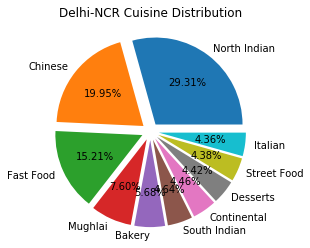

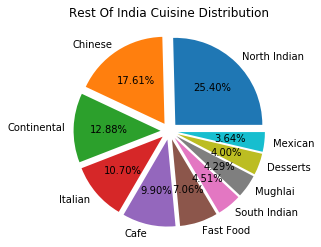

In [93]:
# Cuisines names and their counts for Delhi-NCR and Rest of India
ncr_cuisines = []
ncr_counts = []
rest_cuisine = []
rest_count = []

for i in range(10):
    ncr_cuisines.append(sorted_ncr[i][0])
    ncr_counts.append(sorted_ncr[i][1])
    rest_cuisine.append(sorted_rest[i][0])
    rest_count.append(sorted_rest[i][1])

explode = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
    
plt.pie(ncr_counts, labels = ncr_cuisines, explode=explode, autopct = '%.2f%%')
plt.title('Delhi-NCR Cuisine Distribution')
plt.show()

plt.pie(rest_count, labels = rest_cuisine, explode=explode, autopct = '%.2f%%')
plt.title('Rest Of India Cuisine Distribution')
plt.show()

## 2.	User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant

### a)	Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.
i.	Number of Votes given Restaurant
            

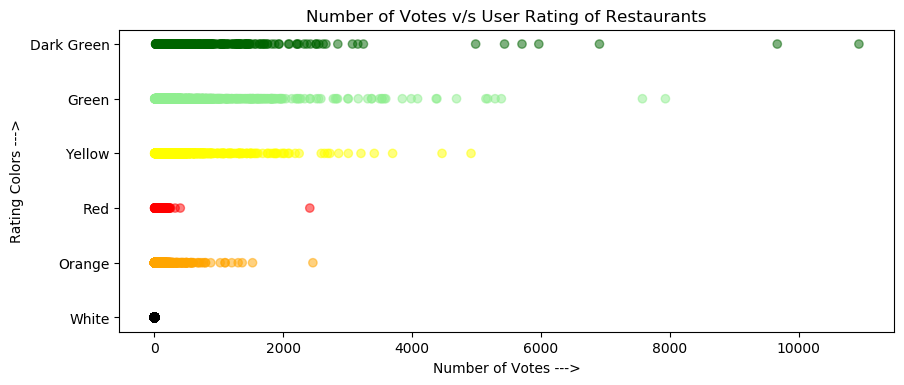

In [94]:
x = df.sort_values(by = 'Votes')['Votes']
y = df.sort_values(by = 'Votes')['Rating color']

color = []
for i in y:
    if i == 'White':
        color.append('Black')
    elif i == 'Dark Green':
        color.append('DarkGreen')
    elif i == 'Green':
        color.append('lightGreen')
    else:
        color.append(i)

plt.figure(num=None, figsize=(10, 4), dpi=100, facecolor='w', edgecolor='green')
plt.scatter(x,y, c = color, alpha = 0.5)
plt.title('Number of Votes v/s User Rating of Restaurants')
plt.xlabel('Number of Votes --->')
plt.ylabel('Rating Colors --->')
plt.show()

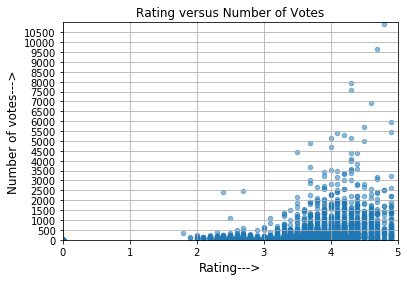

In [95]:
plt.scatter(df['Aggregate rating'], df['Votes'], s=20, alpha=0.5)
plt.yticks(np.arange(0, 11000, 500))
plt.axis([0, 5, 0, 11000])
plt.xlabel('Rating--->', size=12)
plt.ylabel('Number of votes--->', size=12)
plt.title('Rating versus Number of Votes')
plt.grid()
plt.show()

ii. Restaurant serving more number of cuisines. 

Average rating of restaurants serving one cuisine :  2.0550855666774277


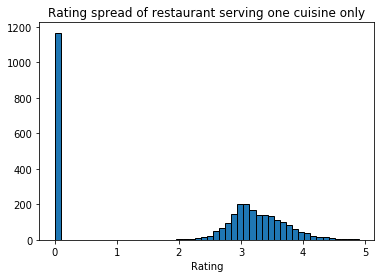

Average rating of restaurants serving multiple cuisine :  2.784374437443748


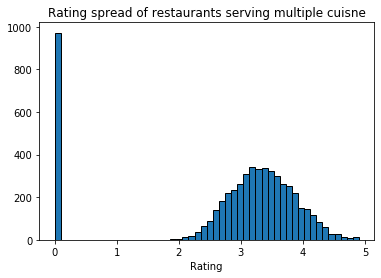

In [96]:
df3 = df1.copy()
df3.Cuisines.fillna('Not Known',inplace=True)
df4 = df3[~df3['Cuisines'].str.contains(',')] # ~ for not condition 
df5 = df3[df3['Cuisines'].str.contains(',')]
print("Average rating of restaurants serving one cuisine : ",df4['Aggregate rating'].mean())

plt.hist(df4['Aggregate rating'],bins=50, edgecolor='black')
plt.title('Rating spread of restaurant serving one cuisine only')
plt.xlabel("Rating")
plt.show()

print("Average rating of restaurants serving multiple cuisine : ",df5['Aggregate rating'].mean())
plt.hist(df5["Aggregate rating"],bins=50, edgecolor='black')
plt.title('Rating spread of restaurants serving multiple cuisne')
plt.xlabel('Rating')
plt.show()

iii. Average Cost of Restaurant 

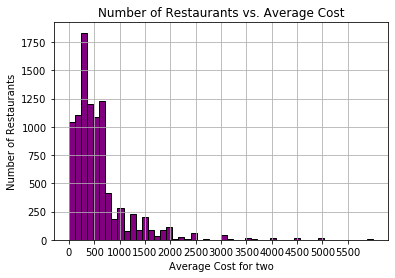

In [97]:
plt.hist(df['Average Cost for two'], range=[0,6000],color='purple', align='mid',bins=50, edgecolor='black')
plt.xticks(np.arange(0, 6000, 500))
plt.grid()
plt.title('Number of Restaurants vs. Average Cost')
plt.xlabel('Average Cost for two')
plt.ylabel('Number of Restaurants')
plt.show()

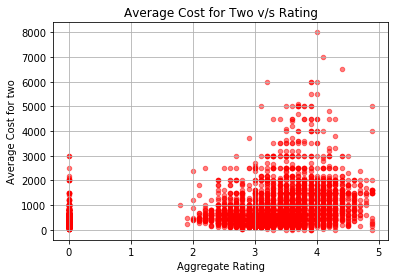

In [98]:
df = df[df['Country Code'] == 1]
df['Aggregate rating'].dropna(inplace = True)

plt.scatter(df['Aggregate rating'], df['Average Cost for two'], s=20, alpha=0.5, c = 'red')
plt.xlabel('Aggregate Rating')
plt.ylabel('Average Cost for two')
plt.title('Average Cost for Two v/s Rating')
plt.grid()
plt.show()

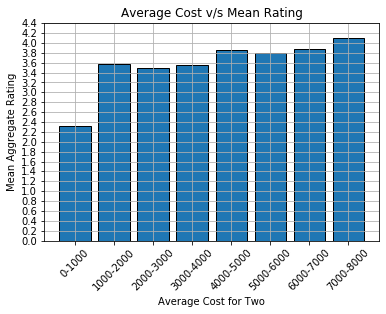

In [99]:
mean_rating = []
average_cost = []
for i in range(0,8000,1000):
    rating = df[(df['Average Cost for two'] >= i) & (df['Average Cost for two'] < (i + 1000))]['Aggregate rating'].mean()
    mean_rating.append(rating)
    cost = str(i) + '-' + str(i+1000)
    average_cost.append(cost)

plt.grid()
plt.bar(average_cost, mean_rating, edgecolor='black')
plt.title('Average Cost v/s Mean Rating')
plt.yticks(np.arange(0, 4.5, 0.2))
plt.xlabel('Average Cost for Two')
plt.ylabel('Mean Aggregate Rating')
plt.xticks(rotation = 45)
plt.show()

iv. Restaurant serving some specific cuisines.

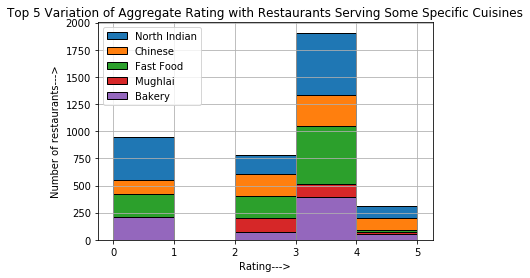

In [100]:
cuisines=df1["Cuisines"]
cuisine=dict()
for i in cuisines:
    a = i.split(',')
    for j in a:
        j = j.strip()
        if j in cuisine:
            cuisine[j]=cuisine[j]+1
        else:
            cuisine[j]=1

popular=sorted(cuisine.items(),key=lambda kv:kv[1], reverse=True)[:5] 
popular_cuisines=[]
for i in popular:
    popular_cuisines.append(i[0])
    
for i in popular_cuisines:
    rating=[]
    for j, k in zip(df1.Cuisines, df1['Aggregate rating']):
        if i in j:
            rating.append(k)
    plt.hist(rating, edgecolor='black', bins=[0, 1, 2, 3, 4, 5])
    plt.xlabel('Rating--->')
    plt.ylabel('Number of restaurants--->')
    plt.title('Top 5 Variation of Aggregate Rating with Restaurants Serving Some Specific Cuisines')
plt.grid()
plt.legend(labels=popular_cuisines)
plt.show()

### b)	Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?
i.	Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .


In [101]:
df = df[df['Country Code'] == 1]

x = df.groupby(by = 'Locality').apply(lambda x: ((x['Votes'] * x['Aggregate rating']).sum()))
y = df.groupby(by = 'Locality').apply(lambda x: (x['Votes'].sum()))

weighted_rating = x/y
round(weighted_rating, 3)

sorted_weighted_rating = weighted_rating.sort_values(ascending = False)[0:10]

print('Top 10 Localities with More Weighted Restaurant Rating')
print()
print(round(sorted_weighted_rating, 2))

Top 10 Localities with More Weighted Restaurant Rating

Locality
Aminabad                            4.90
Hotel Clarks Amer, Malviya Nagar    4.90
Friends Colony                      4.89
Powai                               4.84
Kirlampudi Layout                   4.82
Express Avenue Mall,  Royapettah    4.80
Deccan Gymkhana                     4.80
Banjara Hills                       4.72
Sector 5, Salt Lake                 4.71
Riverside Mall, Gomti Nagar         4.70
dtype: float64


## 3.	Visualization

### a). Plot the bar graph top 15 restaurants have a maximum number of outlets.

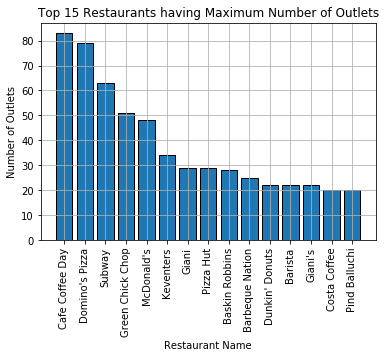

In [102]:
df3 = df[df['Country Code']==1]
x = df3['Restaurant Name'].value_counts()
x = x.head(15)
res_name = x.index
num_res = []
for i in x:
    num_res.append(i)
plt.bar(res_name, num_res, edgecolor='black') 
plt.xticks(rotation=90)
plt.title('Top 15 Restaurants having Maximum Number of Outlets')
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Outlets')
plt.grid()
plt.show()

### b). Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).

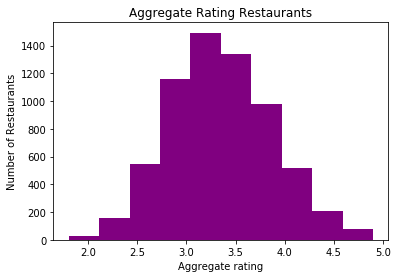

In [103]:
# dropping unrated restaunrants.
df.drop(df[df['Rating text'] == 'Not rated'].index , inplace = True)

plt.hist(df['Aggregate rating'], align='mid', color='purple')
plt.title('Aggregate Rating Restaurants')
plt.xlabel('Aggregate rating')
plt.ylabel('Number of Restaurants')
plt.show()

### c).	Plot the bar graph top 10 restaurants in the data with the highest number of votes.

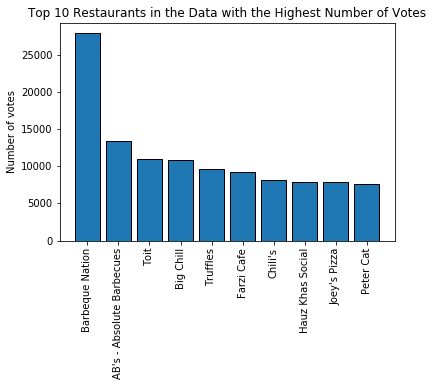

In [104]:
df3 = df[df['Country Code']==1]
votes_num = df3.groupby("Restaurant Name")["Votes"].sum().sort_values(ascending=False)[0:10]
restaurant = votes_num.index
vote = votes_num.values

plt.xticks(rotation=90)
plt.bar(restaurant,vote, edgecolor='black')
plt.ylabel("Number of votes")
plt.title('Top 10 Restaurants in the Data with the Highest Number of Votes')
plt.show()

### d).	Plot the pie graph of top 10 cuisines present in restaurants in the USA.

Top 10 cuisines served by maximum number of restaurants in USA



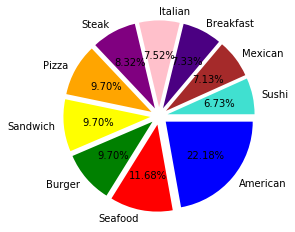

In [110]:
data = pd.read_csv(r'C:\Users\Saachi Talwar\Desktop\zomato\zomato.csv', encoding='latin')
df = data.copy()

df = df[df['Country Code'] == 216]

df.reset_index(drop = True, inplace = True)
df['Cuisines'].fillna('Not known',inplace = True)
df['Cuisines'] = df['Cuisines'].str.split(', ')

usa_cuisines = {}
for i in df['Cuisines'] : 
    for j in i:
        usa_cuisines[j] = usa_cuisines.get(j, 0) + 1
    
top_cuisines = sorted(usa_cuisines.items(), key = lambda kv:kv[1], reverse = True)[:10]

cuisine_name = []
label = []

print('Top 10 cuisines served by maximum number of restaurants in USA')
print()

for i in top_cuisines:
    cuisine_name.append(i[1])
    label.append(i[0])
explode = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
colors = ['blue', 'red', 'green', 'yellow', 'orange', 'purple', 'pink', 'indigo', 'brown', 'turquoise']
plt.pie(cuisine_name, labels = label, colors=colors, autopct='%.2f%%', counterclock=False, explode=explode)
plt.show()

### e).	Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

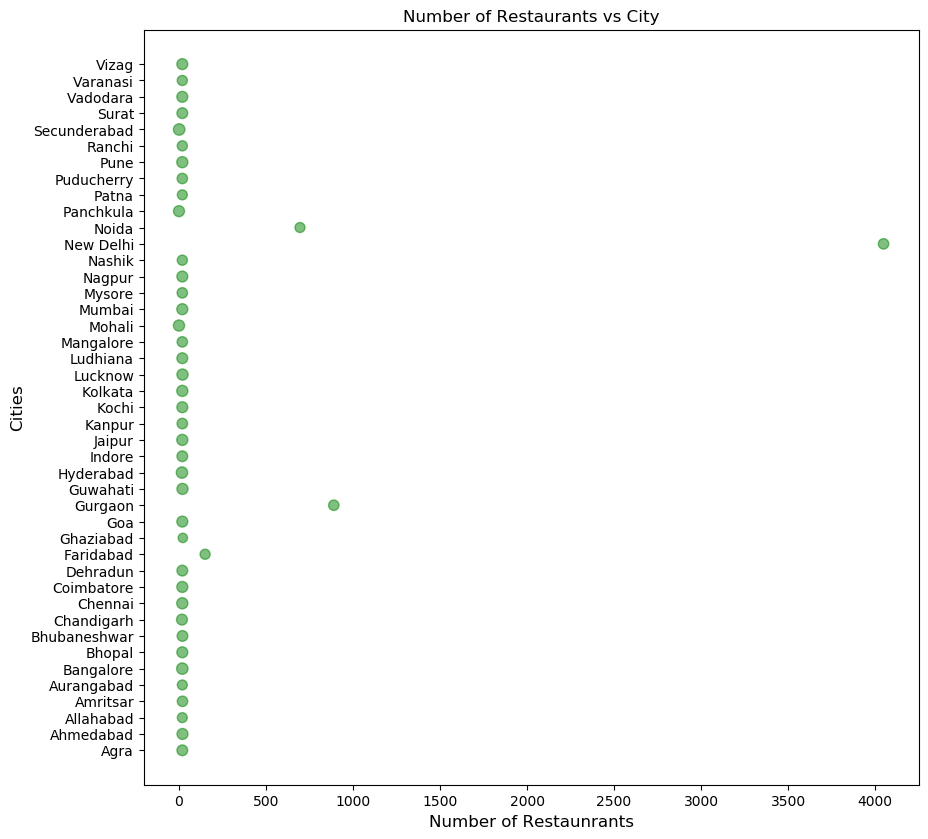

In [67]:
df = df[df['Country Code'] == 1]

# grouping dataframe by City and calculating Weighted rating.
x = df.groupby(by = 'City').apply(lambda x: ((x['Votes'] * x['Aggregate rating']).sum()))
y = df.groupby(by = 'City').apply(lambda x: (x['Votes'].sum()))
restaurant_count = df.groupby(by = 'City').count()['Restaurant Name']
weighted_rating = x/y

# plotting bubble graph and keeping weighted rating as size of the bubble.
plt.figure(num=None, figsize=(10, 10), dpi=100, facecolor='w', edgecolor='green')
plt.scatter(restaurant_count.values, restaurant_count.index,s = weighted_rating*15, alpha = 0.5, c = 'green')
plt.title('Number of Restaurants vs City')
plt.xlabel('Number of Restaunrants', size = 12)
plt.ylabel('Cities', size = 12)
plt.show()

In [112]:
pwd

'C:\\Users\\Saachi Talwar'